In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('IRIS.csv')


In [83]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
df.isnull().sum() #To check for missing values in the dataset

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [86]:
df.species.value_counts() #To check the number of unique values in the dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [87]:
#Import python libraries to plot the data using a Count plot and a Scatter plot:
import seaborn as sns  


C:\Users\b_att\AppData\Local\Temp\ipykernel_13136\467718596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['species'], palette='cool')


<Axes: xlabel='count', ylabel='species'>

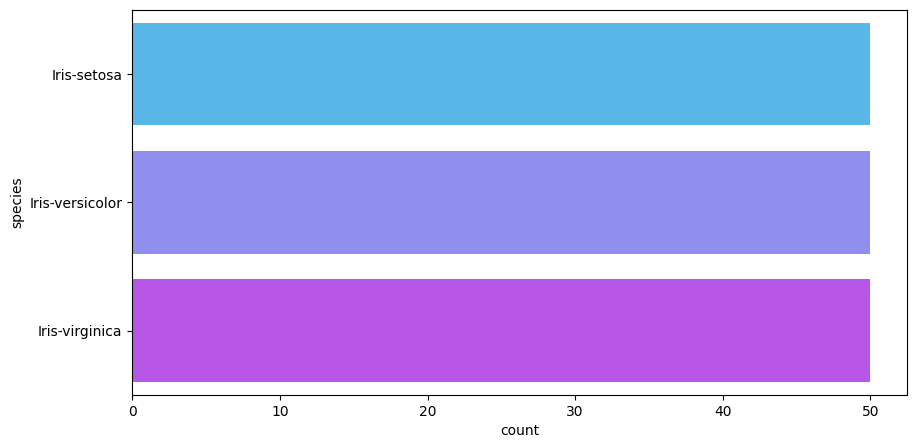

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(df['species'], palette='cool')

In [89]:
df.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

<Axes: >

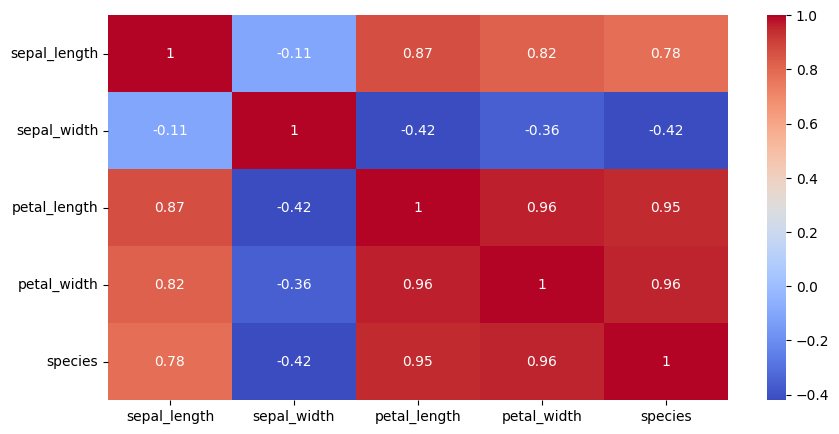

In [90]:
# corr
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [91]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [92]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [93]:
X = df.drop(columns=['species'])
Y= df['species']


In [94]:
from sklearn.model_selection import train_test_split 
#Splits the dataset X and Y into training and testing sets, with 10% of the data used for testing.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
# train_test_split: This function is used to split data into random train and test subsets.
# X: represents the feature data (independent variables) & Y: represents the target data (dependent variable)
# test_size=0.1:  10% data should be used as the test set & 90% will be for training.
# stratify=Y: To ensures the split will maintain the same proportion of target labels in both the training and testing sets. Each class shpuld be adequately represented in both subsets.
# random_state=1: This parameter sets a seed for the random number generator to ensure that the results are reproducible.

x_train

,sepal_length,sepal_width,petal_length,petal_width
77,6.7,3.0,5.0,1.7
114,5.8,2.8,5.1,2.4
110,6.5,3.2,5.1,2.0
139,6.9,3.1,5.4,2.1
39,5.1,3.4,1.5,0.2
...,...,...,...,...
45,4.8,3.0,1.4,0.3
118,7.7,2.6,6.9,2.3
41,4.5,2.3,1.3,0.3
127,6.1,3.0,4.9,1.8


In [95]:
# import different models classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}


# import cross_val_score

# create a function to train and evaluate the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [96]:
model_scores = fit_and_score(models=models,
                                x_train=x_train,
                                x_test=x_test,
                                y_train=y_train,
                                y_test=y_test)
model_scores

c:\Users\b_att\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9333333333333333,
 'SVM': 0.9333333333333333,
 'Random Forest': 0.9333333333333333,
 'Decision Tree': 0.9333333333333333,
 'KNN': 0.9333333333333333}

In [97]:
best_model = max(model_scores, key=model_scores.get)
best_model

'Logistic Regression'

In [98]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)


c:\Users\b_att\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

In [99]:
x_test.head(10)

,sepal_length,sepal_width,petal_length,petal_width
106,4.9,2.5,4.5,1.7
98,5.1,2.5,3.0,1.1
113,5.7,2.5,5.0,2.0
37,4.9,3.1,1.5,0.1
53,5.5,2.3,4.0,1.3
8,4.4,2.9,1.4,0.2
43,5.0,3.5,1.6,0.6
102,7.1,3.0,5.9,2.1
56,6.3,3.3,4.7,1.6
148,6.2,3.4,5.4,2.3


In [101]:
input_data=(5.7,2.5,5.0,2.0) #Provided input data from 3rd row from above table. Expected output is 2.
#changing input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
#To convert the tuple input_data into a NumPy array  for efficient prediction

In [102]:
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) #reshape(1, -1) method reshapes the array to have one row and as many columns as needed to accommodate all the elements. 
#The -1 tells NumPy to automatically determine the number of columns based on the length of the original array.

In [103]:
prediction = reg.predict(input_data_reshaped)
prediction


c:\Users\b_att\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

# new data is classified as 2